<a href="https://colab.research.google.com/github/xyhosino/DeepLearning/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E7%AC%AC4%E8%AF%BE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df_heart = pd.read_csv('/content/drive/MyDrive/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#把3个文本型变量转变为哑变量
a = pd.get_dummies(df_heart['cp'], prefix= 'cp')
b = pd.get_dummies(df_heart['thal'], prefix= 'thal')
c = pd.get_dummies(df_heart['slope'], prefix= 'slope')
#把哑变量添加到dataframe
frames = [df_heart,a, b, c]
df_heart = pd.concat(frames, axis= 1)
df_heart = df_heart.drop(columns=['cp','thal','slope'])
df_heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
df_heart.target.value_counts()

,count
target,
1,165
0,138


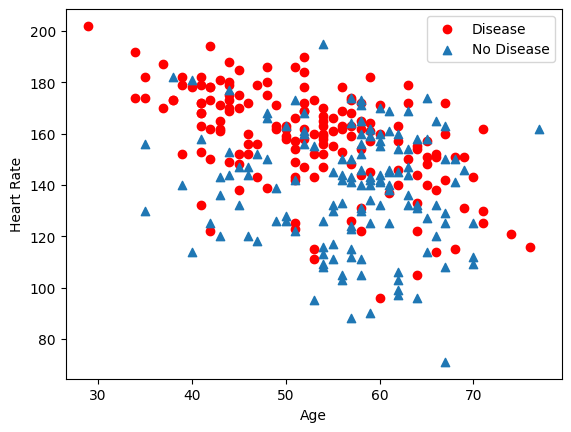

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target ==1],
    y=df_heart.thalach[(df_heart.target==1)], c= 'red')
plt.scatter(x=df_heart.age[df_heart.target ==0],
    y=df_heart.thalach[(df_heart.target==0)], marker= '^')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

In [ ]:
x = df_heart.drop(['target'], axis=1)
y = df_heart.target.values
y = y.reshape(-1,1)
print('张量X的形状：', x.shape)
print('张量y的形状：', y.shape)

张量X的形状： (303, 21)
张量y的形状： (303, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.preprocessing import MinMaxScaler #导入数据缩放器
scaler = MinMaxScaler() #选择归一化数据缩放器MinMaxScaler
x_train = scaler.fit_transform(x_train) #特征归一化训练集fit_transform
x_test = scaler.transform(x_test) #特征归一化测试集transform

In [ ]:
def sigmoid(z):
  y_hat = 1/(1+np.exp(-z))
  return y_hat

In [ ]:
#定义损失函数
def loss_function(x, y, w, b):
  y_hat = sigmoid(np.dot(x,w) + b )
  loss = -((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  cost = np.sum(loss) / x.shape[0]
  return cost

In [ ]:
#构建梯度下降函数
def gradient_descent(x, y, w, b, lr, iter):
  l_history = np.zeros(iter)
  w_history = np.zeros((iter, w.shape[0], w.shape[1]))
  b_history = np.zeros(iter)
  for i in range(iter):
    y_hat = sigmoid(np.dot(x,w) + b)
    loss = -(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    derivative_w = np.dot(x.T, (y_hat-y))/x.shape[0]
    derivative_b = np.sum(y_hat-y)/x.shape[0]
    w = w - lr*derivative_w
    b = b - lr*derivative_b
    l_history[i] = loss_function(x, y, w, b)
    print('轮次', i+1, '当前轮次训练损失：', l_history[i])
    w_history[i] = w
    b_history[i] = b
  return l_history, w_history, b_history

In [ ]:
def predict(x,w,b): # 定义预测函数
    z = np.dot(x,w) + b # 线性函数
    y_hat = sigmoid(z) # 逻辑函数转换
    y_pred = np.zeros((y_hat.shape[0],1)) # 初始化预测结果变量
    for i in range(y_hat.shape[0]):
        if y_hat[i,0] < 0.5:
            y_pred[i,0] = 0 # 如果预测概率小于0.5，输出分类0
        else:
            y_pred[i,0] = 1 # 如果预测概率大于0.5，输出分类1
    return y_pred # 返回预测分类的结果

In [ ]:
def logistic_regression(x,y,w,b,lr,iter): # 定义逻辑回归模型
    l_history,w_history,b_history = gradient_descent(x,y,w,b,lr,iter)#梯度下降
    print("训练最终损失:", l_history[-1]) # 打印最终损失
    y_pred = predict(x,w_history[-1],b_history[-1]) # 进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y_train))*100 # 计算准确率
    print("逻辑回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return l_history, w_history, b_history # 返回训练历史记录

In [ ]:
#初始化参数
dimension = x.shape[1] # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension,1),0.1) # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0 # 偏置值
#初始化超参数
alpha = 1 # 学习速率
iterations = 500 # 迭代次数

In [ ]:
# 用逻辑回归函数训练机器
loss_history, weight_history, bias_history =  logistic_regression(x_train,y_train,weight,bias,alpha,iterations)

轮次 1 当前轮次训练损失： 0.6146283435453799
轮次 2 当前轮次训练损失： 0.5574466110276635
轮次 3 当前轮次训练损失： 0.5188057285082361
轮次 4 当前轮次训练损失： 0.4916238353195442
轮次 5 当前轮次训练损失： 0.4718214691677175
轮次 6 当前轮次训练损失： 0.4569327259744983
轮次 7 当前轮次训练损失： 0.4454242907344381
轮次 8 当前轮次训练损失： 0.43631157372573126
轮次 9 当前轮次训练损失： 0.42894215429344623
轮次 10 当前轮次训练损失： 0.422871019433671
轮次 11 当前轮次训练损失： 0.4177866259579663
轮次 12 当前轮次训练损失： 0.41346575902231436
轮次 13 当前轮次训练损失： 0.409745166299063
轮次 14 当前轮次训练损失： 0.40650324753548706
轮次 15 当前轮次训练损失： 0.40364793932017723
轮次 16 当前轮次训练损失： 0.4011085164193698
轮次 17 当前轮次训练损失： 0.3988299288713802
轮次 18 当前轮次训练损失： 0.3967688171949696
轮次 19 当前轮次训练损失： 0.3948906606527979
轮次 20 当前轮次训练损失： 0.39316770473997675
轮次 21 当前轮次训练损失： 0.3915774336648091
轮次 22 当前轮次训练损失： 0.3901014299367742
轮次 23 当前轮次训练损失： 0.3887245128522442
轮次 24 当前轮次训练损失： 0.38743408056508294
轮次 25 当前轮次训练损失： 0.38621960257416865
轮次 26 当前轮次训练损失： 0.38507222459540763
轮次 27 当前轮次训练损失： 0.3839844582778503
轮次 28 当前轮次训练损失： 0.3829499355929759
轮次 29 当前轮次训练损失： 0.3819

In [ ]:
y_pred = predict(x_test,weight_history[-1],bias_history[-1]) # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test))*100 # 计算准确率
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 85.25%


In [ ]:
print ("逻辑回归预测分类值:",predict(x_test,weight_history[-1],bias_history[-1]))

逻辑回归预测分类值: [[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


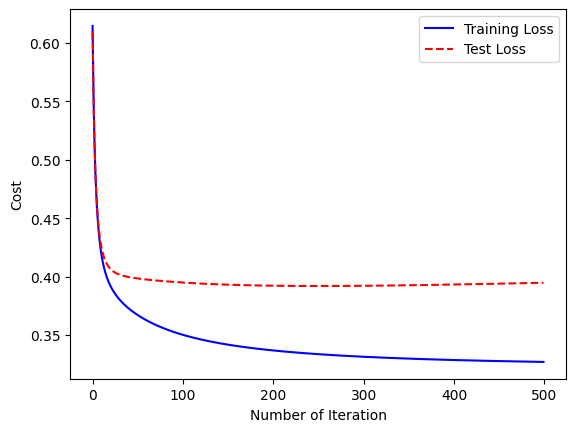

In [ ]:
loss_history_test = np.zeros(iterations) # 初始化历史损失
for i in range(iterations): #求训练过程中不同参数带来的测试集损失
    loss_history_test[i] = loss_function(x_test,y_test,weight_history[i],bias_history[i])
index = np.arange(0,iterations,1)
plt.plot(index, loss_history,c='blue',linestyle='solid')
plt.plot(index, loss_history_test,c='red',linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show() # 同时显示显示训练集和测试集损失曲线

In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# 生成示例数据集（实际使用时替换为您的数据）
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 将y转换为一维数组（解决警告问题）
y = y.ravel()

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练逻辑回归模型
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_train, y_train)

# 评估模型性能
accuracy = lr.score(x_test, y_test) * 100
print("SK-learn逻辑回归测试准确率{:.2f}%".format(accuracy))

# 可选：显示更多评估指标
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lr.predict(x_test)
print("\n分类报告:")
print(classification_report(y_test, y_pred))
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))


SK-learn逻辑回归测试准确率85.50%

分类报告:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200


混淆矩阵:
[[85  8]
 [21 86]]
